<h2>
Regressão Logística</h2>
<p>Uma Regressão Linear Múltipla buscar entender os relacionamentos entre diversas variáveis explicativas (x) com a variável resposta (y), que, de forma matemática, busca achar os coeficiente (b) da equação:</p>

$y=β0+β1x1+β2x2+...+βnxn$

No caso das Regressões Lineares, a variável resposta é contínua. Dessa forma, ao tentar estimar o preço de um imóvel usando sua área em m2, quantidade de quartos e quantidade de banheiros, a Regressão Linear pode ser uma boa opção.

Porém, como proceder nos casos que a variável resposta não é contínua, mas binária? Imagine que, dado o valor pago por um passageiro em uma cabine no Titanic, queremos saber se ele sobreviveu ou não.

Matematicamente, podemos representar a sobrevivência como 1 e a não sobrevivência como 0, e a partir daí fazer a modelagem usando Regressão Linear. Entretanto, ao modelar dessa forma, não estamos restringindo o valor que a variável resposta pode assumir; logo, valores estranhos podem aparecer, como no gráfico.

       
    
<img src='https://s3-sa-east-1.amazonaws.com/lcpi/58deaec1-575b-489a-816a-5c47716b5170.png' width='60%'>

O eixo Y indica se a pessoa sobreviveu (1) ou não (0). Já o eixo X indica o valor pago pela cabine. É possível perceber que quanto maior o valor pago pela cabine, maior a chance de sobreviver. Porém, chance é sinônimo de probabilidade (estatísticos, me perdoem), que é um valor entre 0 e 1. Dessa forma, o ponto azul na extremidade superior direita nos dá uma intuição de algo errado, afinal probabilidade de sobrevivência de 1,6 não existe.

# 2. Transformação
## 2.1. Logística

A variável resposta predita ao utilizar Regressão Linear para modelar o problema estará vaga, num espectro de valores infinitamente amplo. Nesse cenário de variável resposta binária, se faz necessária a aplicação de algumas transformações para que possamos ajustar um modelo de forma linear.

Para isso, utilizaremos o logito (logit), que é uma função que mapeia a probabilidade de pertencimento a uma classe com amplitude de ±∞, ao invés de 0 e 1. Matematicamente, é uma função do tipo f(x)=log(x1−x), com o gráfico descrito abaixo. Seu gráfico está descrito na imagem a seguir e podemos vê-la sendo limitada com assíntotas verticais em 0 e 1.

<img width='60%' src='https://s3-sa-east-1.amazonaws.com/lcpi/9cf608da-f68e-42c9-b8d3-e204b226fbf1.png'>

Porém, na forma como o gráfico está descrito, o que está sendo limitado é o eixo X, que no padrão seguido nas aulas é a nossa variável explicativa. Entretanto, o que precisamos é que a nossa variável resposta, eixo Y, esteja limitada entre 0 e 1. Dessa forma, precisamos do inverso do logito, que é a função logística, dada por f(x)=ex1+e−x. Aplicando a função logística, temos:

<img width='60%' src='https://s3-sa-east-1.amazonaws.com/lcpi/d474853f-f406-40e9-b36c-0809a6d1a465.png'>

Como queremos que nossa variável reposta seja uma probabilidade p entre 0 e 1 (redundância proposital), podemos aplicar a função logística na função de Regressão Linear, obtendo:

$y=p=\frac{ 1 }{ 1+e−(β0+β1x1+β2x2+...+βnxn) }$

## 2.2. Chances (Odds)

Porém, seria interessante que mantivéssemos a equação em um formato linear, como é na Regressão Linear, afinal, única coisa que queremos modificar é a resposta. Para tirar a função exponencial do denominador da função, usaremos chances (Odds) ao invés de probabilidades. Chamaremos de Odds a proporção entre sobrevivência (1) e não sobrevivência (0), ou, em outras palavras, a probabilidade de um evento ocorrer sobre a probabilidade dele não ocorrer. Representamos da seguinte forma:

$Odds(Y=1)=\frac{p}{1−p}$
 
Isolando o p na Odds, temos:

$Odds=\frac{p}{1−p}⇒(1−p)×Odds=p⇒$
$Odds−(p×Odds)=p$
$⇒Odds=p+(p×Odds)⇒Odds=p×(1+Odds)$
$p=\frac{Odds}{1+Odds}$

Fazendo as devidas manipulações algébricas, chegamos em:

$log(Odds)=β0+β1x1+β2x2+...+βnxn$

Dessa forma, estamos mapeando em uma probabilidade p qualquer valor (−∞,∞), usando um modelo linear para prever essa probabilidade. Por sua vez, podemos mapear esse valor para definir a sobrevivência ou não sobrevivência a partir de um ponto de corte: qualquer valor de probabilidade acima de 0.5, por exemplo, pode ser definido como sobrevivência.

# 3. Aplicação

Agora, aplicando uma Regressão Logística aos dados do Titanic, temos:

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


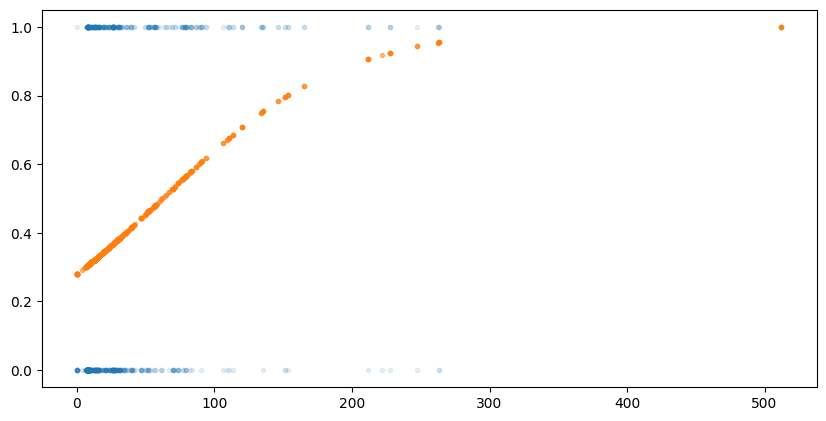

In [8]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
df = sns. load_dataset('titanic')
print(df.head())
x = df.fare.values.reshape(-1, 1)
y = df.survived

lr = LogisticRegression()

lr.fit(x, y)

y_pred = lr.predict_proba(x)[:, 1]

plt.figure(figsize = (10, 5), dpi = 100)

plt.plot(x, y, '.', alpha = 0.1)
plt.plot(x, y_pred, '.', alpha = 0.5)
plt.show()

Vale salientar que a resposta da equação é o logarítimo das chances, e não uma probabilidade em si. Por "sorte", o sklearn já faz as transformações necessárias ao usar o método .predict_proba().

# 4. Estimação e Interpretação do Modelo
Uma vantagem da regressão logística é a sua rápida estimação em novos casos, sem necessidade de grandes cálculos, afinal, basta usarmos as variáveis explicativas, multiplicarmos pelo seus respectivos coeficientes e fazer a transformação em probabilidade.    
  
Outra grande vantagem é em relação à interpretação do modelo. Ora, a Odds é a chance de um evento ocorrrer sobre as chances de ele não ocorrrer.      
Logo, se $Odds=2$, podemos interpretar como $Odds=\frac{2}{1}=\frac{chance do evento ocorrrer}{chance do evento não ocorrrer},   
e temos que a chance do evento ocorrer é duas vezes maior que ele não ocorrer.   
   
Podemos checar os coeficientes da equação utilizando lr.coef_.   
    
Até agora estamos modelando as chances/probabilidades de sobrevivência em termos do valor pago na cabine.    
Porém, da mesma forma que na Regressão Linear, na Regressão Logística também podemos fazer uma análise multivariada e modelar com $N$ variáveis. Dessa forma, a vantagem da interpretabilidade do modelo fica ainda mais forte.    
     